In [2]:
base_path = "data/metric_results/"

# cross model
models = ["gemma3_4b", "llama3.2_3b", "qwen3_4b", "minicpm3_4b", "smollm3_3b"]

datasets = ["college_student", "music_music_fan", "movie_movie_fan"]

from get_overall_stats import calculate_metrics_stats
import json

for model in models:
    print(f" \\textbf{{{model}}}", end="")
    for dataset in datasets:
        file_path = f"{base_path}/{model}_{dataset}.json"

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            stats = calculate_metrics_stats(data)
            

            print(
                f" & {stats["overall_mean_iou"]} \\tpms{{{stats["overall_mean_std_iou"]}}} \
                & {stats["overall_mean_serp"]} \\tpms{{{stats["overall_mean_std_serp"]}}} \
                & {stats["overall_mean_prag"]} \\tpms{{{stats["overall_mean_std_prag"]}}} \
                & {stats["overall_mean_diversity"]} \\tpms{{{stats["overall_mean_std_diversity"]}}} \
            ", end="")
    print("\\\\")


print()
print("-"*20)
print()
      
# scaling
models = ["gemma3_1b", "gemma3_4b", "gemma3_12b", "llama3.2_1b", "llama3.2_3b", "qwen3_1.7b", "qwen3_4b", "qwen3_14b"]

for model in models:
    print(f" \\textbf{{{model}}}", end="")
    for dataset in datasets:
        file_path = f"{base_path}/{model}_{dataset}.json"

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            stats = calculate_metrics_stats(data)
            

            print(
                f" & {stats["overall_mean_iou"]} \\tpms{{{stats["overall_mean_std_iou"]}}} \
                & {stats["overall_mean_serp"]} \\tpms{{{stats["overall_mean_std_serp"]}}} \
                & {stats["overall_mean_prag"]} \\tpms{{{stats["overall_mean_std_prag"]}}} \
                & {stats["overall_mean_diversity"]} \\tpms{{{stats["overall_mean_std_diversity"]}}} \
            ", end="")
    print("\\\\")


print()
print("-"*20)
print()

# scaling qwen
models = ["qwen3_0.6b", "qwen3_1.7b", "qwen3_4b", "qwen3_8b", "qwen3_14b", "qwen3_32b"]

for model in models:
    print(f" \\textbf{{{model}}}", end="")
    for dataset in datasets:
        file_path = f"{base_path}/{model}_{dataset}.json"

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            stats = calculate_metrics_stats(data)
            

            print(
                f" & {stats["overall_mean_iou"]} \\tpms{{{stats["overall_mean_std_iou"]}}} \
                & {stats["overall_mean_serp"]} \\tpms{{{stats["overall_mean_std_serp"]}}} \
                & {stats["overall_mean_prag"]} \\tpms{{{stats["overall_mean_std_prag"]}}} \
                & {stats["overall_mean_diversity"]} \\tpms{{{stats["overall_mean_std_diversity"]}}} \
            ", end="")
    print("\\\\")      

 \textbf{gemma3_4b} & 0.675 \tpms{0.091}                 & 0.554 \tpms{0.084}                 & 0.587 \tpms{0.077}                 & 0.98 \tpms{0.02}              & 0.412 \tpms{0.081}                 & 0.337 \tpms{0.071}                 & 0.373 \tpms{0.059}                 & 1.0 \tpms{0.0}              & 0.684 \tpms{0.067}                 & 0.567 \tpms{0.081}                 & 0.64 \tpms{0.069}                 & 0.976 \tpms{0.025}             \\
 \textbf{llama3.2_3b} & 0.614 \tpms{0.12}                 & 0.446 \tpms{0.116}                 & 0.529 \tpms{0.115}                 & 0.914 \tpms{0.079}              & 0.56 \tpms{0.134}                 & 0.353 \tpms{0.16}                 & 0.459 \tpms{0.135}                 & 0.859 \tpms{0.138}              & 0.616 \tpms{0.116}                 & 0.415 \tpms{0.15}                 & 0.548 \tpms{0.11}                 & 0.879 \tpms{0.114}             \\
 \textbf{qwen3_4b} & 0.568 \tpms{0.082}                 & 0.463 \tpms{0.059}                 & 0

In [46]:
%load_ext autoreload
%autoreload 2

from results import *


# 1. Define Country Code Groups
north_america_codes = ["US", "CA"]

europe_codes = [
    "GB", "FR", "DE", "IT", "ES", "PT", "NL", "BE", "CH", "AT", 
    "SE", "NO", "DK", "FI", "IE", "PL", "GR", "CZ", "HU"
]

oceania_west_codes = ["AU", "NZ"]

asia_codes = ["JP", "KR", "CN", "HK", "TW", "IN", "TH", "VN", "MY", "PH", "ID"]

# "Western Culture" as defined by you: North America + Europe + AU + NZ
western_culture_codes = north_america_codes + europe_codes + oceania_west_codes


DATASET_PATH = "data/datasets"
with open(f"{DATASET_PATH}/movie.json") as f:
    my_titles = json.load(f)
    action_movies = get_genres_for_titles(my_titles, genres=["Action"])

print(f"There is {len(action_movies)} action movies")

DATASET_PATH = "data/datasets"
with open(f"{DATASET_PATH}/movie.json") as f:
    my_titles = json.load(f)
    romance_movies = get_genres_for_titles(my_titles, genres=["Romance"])

print(f"There is {len(romance_movies)} romance movies")


# 2. Run the filtering (using the function created in the previous step)
print("Filtering North American movies...")
north_america_movies = get_movies_by_country(my_titles, north_america_codes)

print("Filtering European movies...")
europe_movies = get_movies_by_country(my_titles, europe_codes)

print("Filtering Asian movies...")
asia_movies = get_movies_by_country(my_titles, asia_codes)

print("Filtering Western Culture movies...")
western_movies = get_movies_by_country(my_titles, western_culture_codes)

# 3. Output results
print(f"\nResults Summary:")
print(f"North America: {len(north_america_movies)}")
print(f"Europe: {len(europe_movies)}")
print(f"Asia: {len(asia_movies)}")
print(f"Total Western Culture: {len(western_movies)}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 500/500 [00:25<00:00, 19.45it/s]


There is 80 action movies


100%|██████████| 500/500 [00:16<00:00, 30.17it/s]


There is 62 romance movies
Filtering North American movies...


100%|██████████| 500/500 [00:48<00:00, 10.22it/s]


Filtering European movies...


100%|██████████| 500/500 [00:29<00:00, 17.22it/s]


Filtering Asian movies...


100%|██████████| 500/500 [00:26<00:00, 18.80it/s]


Filtering Western Culture movies...


100%|██████████| 500/500 [00:33<00:00, 15.12it/s]


Results Summary:
North America: 249
Europe: 113
Asia: 138
Total Western Culture: 322


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


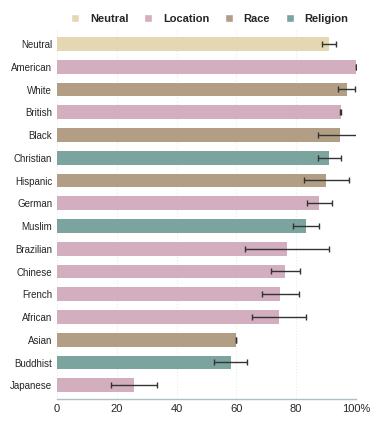

In [5]:
%load_ext autoreload
%autoreload 2

from results import *

personas_config = {
    "neutral": ["neutral"],
    "location": ["an American", "a Brazilian", "a British", "a Chinese", "a French", "a German", "a Japanese", "an African"],
    "race": ["a Black", "a White", "an Asian", "a Hispanic"],
    "religion": ["a Buddhist", "a Christian", "a Muslim"],
}

df_results = analyze_western_bias_horizontal(
    model_name="gemma3_12b",
    dataset_type="movie",
    user_persona_type="movie",
    label="western",
    movie_set=set(western_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)


/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


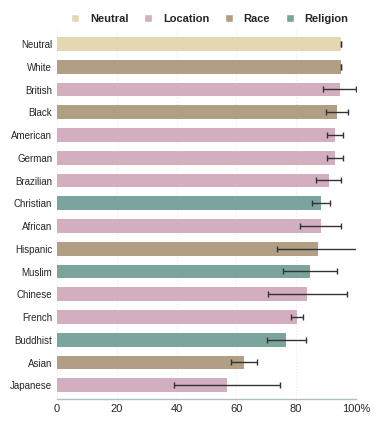

/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


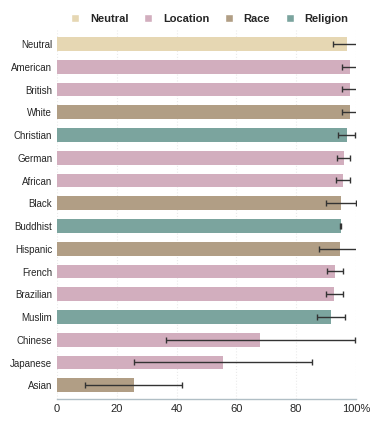

/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


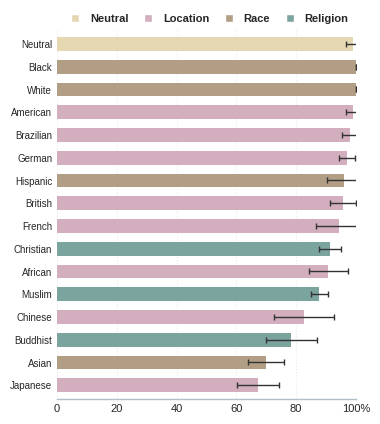

In [14]:
personas_config = {
    "neutral": ["neutral"],
    "location": ["an American", "a Brazilian", "a British", "a Chinese", "a French", "a German", "a Japanese", "an African"],
    "race": ["a Black", "a White", "an Asian", "a Hispanic"],
    "religion": ["a Buddhist", "a Christian", "a Muslim"],
}

df_results = analyze_western_bias_horizontal(
    model_name="gemma3_4b",
    dataset_type="movie",
    user_persona_type="movie",
    label="western",
    movie_set=set(western_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)

df_results = analyze_western_bias_horizontal(
    model_name="llama3.2_3b",
    dataset_type="movie",
    user_persona_type="movie",
    label="western",
    movie_set=set(western_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)

df_results = analyze_western_bias_horizontal(
    model_name="qwen3_14b",
    dataset_type="movie",
    user_persona_type="movie",
    label="western",
    movie_set=set(western_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)


/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


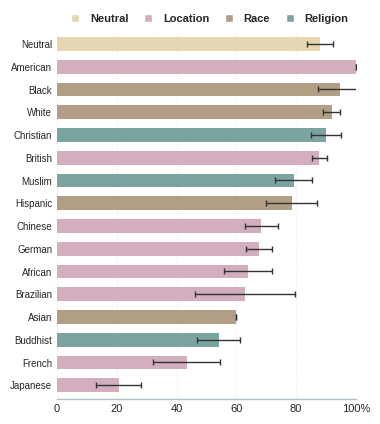

/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


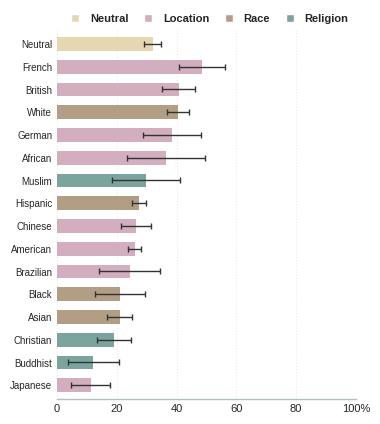

/vast/projects/dyer1/lab/user/alex/biais_llm_rec/results.py:283: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plot_df["Persona"], fontsize=max(6, PLOT_BASE_FONT - 2))


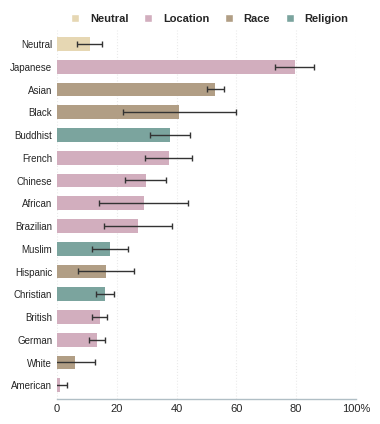

In [15]:
personas_config = {
    "neutral": ["neutral"],
    "location": ["an American", "a Brazilian", "a British", "a Chinese", "a French", "a German", "a Japanese", "an African"],
    "race": ["a Black", "a White", "an Asian", "a Hispanic"],
    "religion": ["a Buddhist", "a Christian", "a Muslim"],
}

df_results = analyze_western_bias_horizontal(
    model_name="gemma3_12b",
    dataset_type="movie",
    user_persona_type="movie",
    label="north_america",
    movie_set=set(north_america_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)

df_results = analyze_western_bias_horizontal(
    model_name="gemma3_12b",
    dataset_type="movie",
    user_persona_type="movie",
    label="europe",
    movie_set=set(europe_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)

df_results = analyze_western_bias_horizontal(
    model_name="gemma3_12b",
    dataset_type="movie",
    user_persona_type="movie",
    label="asia",
    movie_set=set(asia_movies),   # make sure this exists
    personas_config=personas_config,
    fuzzy_cutoff=89,
    save=True,
)


Processing model: gemma3_12b...


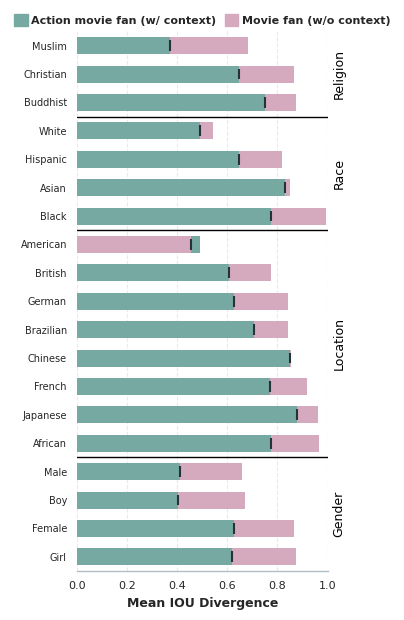

Processing complete.


In [25]:
plot_persona_divergence_horizontal(
    models=("gemma3_12b",),
    dataset_types=("movie", "movie"),
    user_personas=("movie fan", "action movie fan"),
    metrics=("IOU Divergence", "Pragmatic Divergence", "SERP MS Divergence"),
    metric_index=0,
    save=True,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


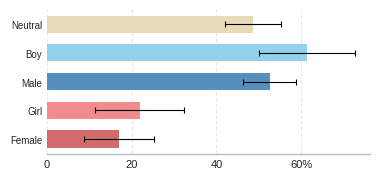

In [50]:
%load_ext autoreload
%autoreload 2

from results import *

df_gender_h = plot_gender_bias_horizontal(
    model_name="llama3.2_3b",
    dataset_type="movie",
    user_persona_type="movie_fan",
    movie_set=action_movies,   # or romance_movies
    include_neutral=True,
    score_cutoff=89,
    save=True,

)


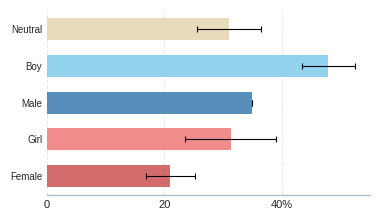

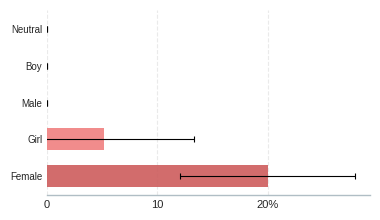

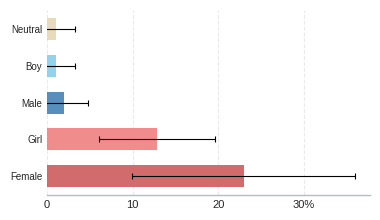

In [9]:
df_gender_h = plot_gender_bias_horizontal(
    model_name="gemma3_4b",
    dataset_type="movie",
    user_persona_type="movie_fan",
    movie_set=action_movies,   # or romance_movies
    include_neutral=True,
    score_cutoff=89,
    save=True,

)

df_gender_h = plot_gender_bias_horizontal(
    model_name="gemma3_4b",
    dataset_type="movie",
    user_persona_type="movie_fan",
    movie_set=romance_movies,   # or romance_movies
    include_neutral=True,
    score_cutoff=89,
    save=True,
    target="romance"
)

df_gender_h = plot_gender_bias_horizontal(
    model_name="llama3.2_3b",
    dataset_type="movie",
    user_persona_type="movie_fan",
    movie_set=romance_movies,   # or romance_movies
    include_neutral=True,
    score_cutoff=89,
    save=True,
    target="romance"
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


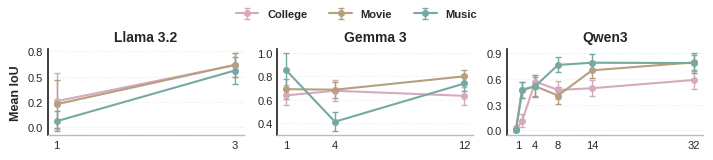

(<Figure size 720x160 with 3 Axes>,
        family        model  size_b          dataset dataset_label    iou  \
 0   Llama 3.2  llama3.2_1b     1.0  college_student       College  0.255   
 1   Llama 3.2  llama3.2_1b     1.0  movie_movie_fan         Movie  0.225   
 2   Llama 3.2  llama3.2_1b     1.0  music_music_fan         Music  0.056   
 3   Llama 3.2  llama3.2_3b     3.0  college_student       College  0.614   
 4   Llama 3.2  llama3.2_3b     3.0  movie_movie_fan         Movie  0.616   
 5   Llama 3.2  llama3.2_3b     3.0  music_music_fan         Music  0.560   
 6     Gemma 3    gemma3_1b     1.0  college_student       College  0.636   
 7     Gemma 3    gemma3_1b     1.0  movie_movie_fan         Movie  0.689   
 8     Gemma 3    gemma3_1b     1.0  music_music_fan         Music  0.848   
 9     Gemma 3    gemma3_4b     4.0  college_student       College  0.675   
 10    Gemma 3    gemma3_4b     4.0  movie_movie_fan         Movie  0.684   
 11    Gemma 3    gemma3_4b     4.0  mus

In [3]:
%load_ext autoreload
%autoreload 2

from results import *

# Example usage
families = {
    "Llama 3.2": ["llama3.2_1b", "llama3.2_3b"],
    "Gemma 3": ["gemma3_1b", "gemma3_4b", "gemma3_12b"],
    "Qwen3": ["qwen3_0.6b", "qwen3_1.7b", "qwen3_4b", "qwen3_8b", "qwen3_14b", "qwen3_32b"],
}


dataset_labels = {
    "college_student": "College",
    "movie_movie_fan": "Movie",
    "music_music_fan": "Music",
}

datasets = ["college_student", "movie_movie_fan", "music_music_fan"]

plot_iou_vs_model_size_by_family(
    base_path=base_path,
    datasets=datasets,
    families=families,
    dataset_labels=dataset_labels,
    save=True,
)
